In [163]:
import pandas as pd
import numpy as np
import cufflinks as cf
import seaborn as sns
%matplotlib inline
from plotly import __version__
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)
cf.go_offline()
print(__version__) # requires version >= 1.9.0

5.15.0


# Comprensión de los Datos

In [164]:
df = pd.read_csv("../data/bike_buyers.csv")

In [165]:
df.head(10)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
7,19364,Married,Male,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,43.0,Yes
8,22155,NaN,Male,20000.0,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [167]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [168]:
variables_con_na = df.columns[df.isna().any()].tolist()
variables_con_na

['Marital Status', 'Gender', 'Income', 'Children', 'Home Owner', 'Cars', 'Age']

In [169]:
na_values = df[df['Marital Status'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
8,22155,NaN,Male,20000.0,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No
27,18283,NaN,Female,100000.0,0.0,Bachelors,Professional,No,1.0,5-10 Miles,Pacific,40.0,No
49,14939,NaN,Male,40000.0,0.0,Bachelors,Clerical,Yes,0.0,0-1 Miles,Europe,39.0,Yes
98,19441,NaN,Male,40000.0,0.0,Graduate Degree,Clerical,Yes,0.0,0-1 Miles,Europe,NaN,Yes
150,26154,NaN,Male,60000.0,1.0,Partial College,Skilled Manual,Yes,1.0,5-10 Miles,Pacific,43.0,Yes
234,24611,NaN,Male,90000.0,0.0,Bachelors,Professional,No,4.0,10+ Miles,Pacific,35.0,Yes
301,17926,NaN,Female,NaN,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Pacific,28.0,Yes


In [170]:
#Dependiendo del numero de hijos se define si estas casado o no
fig = px.box(df, y = 'Children', x = "Marital Status", color = "Gender")
fig.show()

In [171]:
na_values_gender = df[df['Gender'].isna()]
na_values_gender

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
154,23426,Single,NaN,80000.0,5.0,Graduate Degree,Management,Yes,3.0,0-1 Miles,Pacific,40.0,No
335,24369,Married,NaN,80000.0,5.0,Graduate Degree,Management,No,2.0,0-1 Miles,Pacific,39.0,No
601,29231,Single,NaN,80000.0,4.0,Partial College,Professional,No,2.0,0-1 Miles,North America,43.0,No
688,11699,Single,NaN,60000.0,NaN,Bachelors,Skilled Manual,No,2.0,0-1 Miles,North America,NaN,No
695,18390,Married,NaN,80000.0,5.0,Partial College,Professional,Yes,2.0,0-1 Miles,North America,44.0,No
867,26693,Married,NaN,70000.0,3.0,Partial College,Professional,Yes,1.0,5-10 Miles,North America,49.0,No
908,23195,Single,NaN,50000.0,3.0,Bachelors,Skilled Manual,Yes,2.0,2-5 Miles,North America,41.0,Yes
951,22296,Married,NaN,70000.0,0.0,Bachelors,Professional,No,1.0,0-1 Miles,North America,38.0,No
973,11734,Married,NaN,60000.0,1.0,Partial College,Skilled Manual,No,1.0,0-1 Miles,North America,47.0,No


In [172]:
#Eliminamos los na's de la columna genero ya que no se puede inferir su valor con grafico de cajas 

#Puede ser aleatorio tambien
df = df.dropna(subset=['Gender'], axis=0)
df

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,13466,Married,Male,80000.0,5.0,Partial College,Professional,Yes,3.0,1-2 Miles,North America,46.0,No
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


In [173]:
na_values_income = df[df['Income'].isna()]
na_values_income

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes
110,21006,Single,Female,NaN,1.0,Partial College,Manual,No,0.0,0-1 Miles,Europe,46.0,Yes
191,26944,Single,Male,NaN,2.0,High School,Manual,Yes,0.0,0-1 Miles,Europe,36.0,Yes
301,17926,NaN,Female,NaN,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Pacific,28.0,Yes
441,11061,Married,Male,NaN,2.0,Partial College,Skilled Manual,Yes,2.0,5-10 Miles,Pacific,52.0,Yes
509,24357,Married,Male,NaN,3.0,Bachelors,Professional,Yes,1.0,2-5 Miles,North America,48.0,Yes


In [174]:
#Dependiendo de la educación y la ocupación se infiere la ganancia de los na's de la columna income
fig = px.box(df, y = 'Income', x = "Occupation", color = "Education")
fig.show()

In [175]:
#Se verifican que datos contienen los na's de la columna children
na_values_children = df[df['Children'].isna()]
na_values_children

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
117,24065,Single,Female,20000.0,NaN,High School,Manual,Yes,0.0,0-1 Miles,Europe,40.0,Yes
217,13673,Single,Female,20000.0,NaN,Partial High School,Manual,No,2.0,0-1 Miles,Europe,25.0,No
386,28957,Single,Female,120000.0,NaN,Partial High School,Professional,Yes,4.0,10+ Miles,Pacific,34.0,Yes
549,13453,Married,Female,130000.0,NaN,Bachelors,Management,Yes,3.0,0-1 Miles,North America,45.0,Yes
638,18949,Single,Male,70000.0,NaN,Graduate Degree,Management,Yes,2.0,5-10 Miles,North America,74.0,Yes
805,26778,Single,Female,40000.0,NaN,High School,Skilled Manual,Yes,2.0,5-10 Miles,North America,31.0,No
960,23491,Single,Male,100000.0,NaN,Partial College,Professional,No,4.0,1-2 Miles,North America,45.0,No


In [176]:
# Haciendo uso del gráfico de Marital Status, definimos la cantidad de hijos

In [177]:
na_values_homeOwner = df[df['Home Owner'].isna()]
na_values_homeOwner

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
365,22636,Single,Female,40000.0,0.0,Bachelors,Clerical,NaN,0.0,0-1 Miles,Europe,38.0,Yes
646,16247,Single,Female,60000.0,4.0,Graduate Degree,Skilled Manual,NaN,0.0,1-2 Miles,North America,47.0,No
943,24322,Married,Female,60000.0,4.0,Bachelors,Skilled Manual,NaN,2.0,0-1 Miles,North America,42.0,No


In [178]:
#Dependiendo de la cantidad de hijos y el estado civil se infiere si tiene casa o no
fig = px.box(df, y = 'Children', x = "Home Owner", color = "Marital Status")
fig.show()

In [179]:
na_values_cars = df[df['Cars'].isna()]
na_values_cars

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
12,11434,Married,Male,170000.0,5.0,Partial College,Professional,Yes,NaN,0-1 Miles,Europe,55.0,No
196,16209,Single,Female,50000.0,0.0,Graduate Degree,Skilled Manual,Yes,NaN,1-2 Miles,Europe,36.0,No
202,18626,Single,Male,40000.0,2.0,Partial College,Clerical,Yes,NaN,1-2 Miles,Europe,33.0,Yes
351,13572,Single,Male,10000.0,3.0,High School,Manual,Yes,NaN,0-1 Miles,Europe,37.0,Yes
448,11383,Married,Female,30000.0,3.0,Graduate Degree,Clerical,Yes,NaN,0-1 Miles,Europe,46.0,No
511,12207,Single,Male,80000.0,4.0,Bachelors,Management,Yes,NaN,5-10 Miles,North America,66.0,Yes
561,27218,Married,Female,20000.0,2.0,Partial High School,Clerical,No,NaN,0-1 Miles,North America,48.0,No
615,11538,Single,Female,60000.0,4.0,Graduate Degree,Skilled Manual,No,NaN,0-1 Miles,North America,47.0,Yes
933,11941,Single,Male,60000.0,0.0,Partial College,Skilled Manual,Yes,NaN,5-10 Miles,North America,29.0,No


In [180]:
#Dependiendo de la cantidad de la ganancia de la personas y si tiene casa o no se infiere cuantos carros tiene
fig = px.box(df, y = 'Income', x = "Cars", color = "Home Owner")
fig.show()

In [181]:
na_values_age = df[df['Age'].isna()]
na_values_age

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes
98,19441,NaN,Male,40000.0,0.0,Graduate Degree,Clerical,Yes,0.0,0-1 Miles,Europe,NaN,Yes
225,14135,Married,Male,20000.0,1.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,NaN,No
371,22918,Single,Male,80000.0,5.0,Graduate Degree,Management,Yes,3.0,0-1 Miles,Pacific,NaN,No
554,18580,Married,Female,60000.0,2.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,NaN,Yes
770,17699,Married,Male,60000.0,1.0,Graduate Degree,Skilled Manual,No,0.0,0-1 Miles,North America,NaN,No
986,23704,Single,Male,40000.0,5.0,High School,Professional,Yes,4.0,10+ Miles,North America,NaN,Yes


In [182]:
# Se infiere la edad en función de Marital Status y la cantidad de hijos
fig = px.box(df, y = 'Age', x = "Marital Status", color = "Children")
fig.show()

# Preparación de los Datos

In [183]:
#Para reemplazar los valores NA de Marital Status, primero obtenemos el porcentaje de Marital Status por Gender
distribucion_marital_status = df.groupby('Gender')['Marital Status'].value_counts(normalize=True)

print(distribucion_marital_status)

Gender  Marital Status
Female  Single            0.509240
        Married           0.490760
Male    Married           0.585859
        Single            0.414141
Name: Marital Status, dtype: float64


In [184]:
#Reemplazo de valores NA en Marital Status Según Género y cantidad de hijos
def fill_marital_status(row):
    if pd.isnull(row['Marital Status']):
        if row['Children'] <= 1:
            return 'Single'
        elif row['Children'] <= 3:
            return 'Married'
        elif row['Children'] <= 4 and row['Gender'] == 'Male':
            return 'Married'
        else:
            return 'Single'
    else:
        return row['Marital Status']
df['Marital Status'] = df.apply(fill_marital_status, axis=1)

In [185]:
#Verificamos el reemplazo de todos los NA en Marital Status
na_values = df[df['Marital Status'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


In [186]:
#Verificamos que no hemos modificado valores diferentes a NA
distribucion_marital_status = df.groupby('Gender')['Marital Status'].value_counts(normalize=True)

print(distribucion_marital_status)

Gender  Marital Status
Female  Single            0.511247
        Married           0.488753
Male    Married           0.582000
        Single            0.418000
Name: Marital Status, dtype: float64


In [187]:
df["Income"].describe()

count       983.000000
mean      56124.109868
std       31193.712788
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

In [188]:
# Calcular la media de 'Income' por 'Occupation' y 'Education'
media_income = df.groupby(['Occupation', 'Education'])['Income'].transform('mean')
df['Income'].fillna(media_income, inplace=True)

In [189]:
#Verificamos el reemplazo de todos los NA en Income
na_values = df[df['Income'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


In [190]:
#Verificamos que no se hallan modificado valores ajenos a los NA en Income
df["Income"].describe()

count       989.000000
mean      55987.508017
std       31194.558980
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

In [191]:
#Información detallada de Children
df["Children"].describe()

count    982.000000
mean       1.901222
std        1.621535
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Children, dtype: float64

In [192]:
# Calcular la media de 'Children' por 'Gender' y 'Marital Status'
media_children = df.groupby(['Gender', 'Marital Status'])['Children'].transform('mean')
df['Children'].fillna(media_children, inplace=True)

In [193]:
#Verificamos el correcto reemplazo
na_values = df[df['Children'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


In [194]:
#Verificamos que no se hayan modificado valores ajenos a NA
df["Children"].describe()

count    989.000000
mean       1.900143
std        1.615904
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Children, dtype: float64

In [195]:
#Visualizamos mejor la data de Home Owner
df["Home Owner"].describe()

count     985
unique      2
top       Yes
freq      676
Name: Home Owner, dtype: object

In [196]:
#calculamos la media de Home Owner en función de Children y Marital Status
media_home_owner = df.groupby(['Children', 'Marital Status'])['Home Owner'].transform(lambda x: x.mode().iloc[0])

In [197]:
#reemplazamos los NA
df['Home Owner'].fillna(media_home_owner, inplace=True)

In [198]:
#Verificamos el reemplazo
na_values = df[df['Home Owner'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


In [199]:
#Verificamos la data de 'Home Owner'
df["Home Owner"].describe()

count     989
unique      2
top       Yes
freq      679
Name: Home Owner, dtype: object

In [200]:
#Obtenemos datos detallados de Cars
df["Cars"].describe()

count    980.000000
mean       1.454082
std        1.124949
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Cars, dtype: float64

In [201]:
#Definimos la cantidad de Cars en función de Income y de Home Owner
media_cars = df.groupby(['Income', 'Home Owner'])['Cars'].transform('mean')
df['Cars'].fillna(media_cars, inplace=True)

In [202]:
#Verificamos el correcto reemplazo
na_values = df[df['Cars'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
12,11434,Married,Male,170000.0,5.0,Partial College,Professional,Yes,NaN,0-1 Miles,Europe,55.0,No


In [203]:
#Visualizamos que no se reemplazó un NA debido a la falta de datos de personas con Income tan alto
#Ante esta situación, buscamos cuáles son las personas con mayores ingresos
personas_ingreso_alto = df.nlargest(5, 'Income')
personas_ingreso_alto

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
12,11434,Married,Male,170000.0,5.0,Partial College,Professional,Yes,NaN,0-1 Miles,Europe,55.0,No
43,17185,Married,Female,170000.0,4.0,Partial College,Professional,No,3.0,5-10 Miles,Europe,48.0,Yes
829,16009,Single,Male,170000.0,1.0,Graduate Degree,Management,No,4.0,0-1 Miles,North America,66.0,No
6,27974,Single,Male,160000.0,2.0,High School,Management,Yes,4.0,0-1 Miles,Pacific,33.0,Yes
178,14191,Married,Male,160000.0,4.0,Partial College,Professional,No,2.0,10+ Miles,Europe,55.0,Yes


In [204]:
#Definimos la cantidad de Cars en 4, habiendo analizado la cantidad de hijos, el Income y Home Owner
df.loc[df['ID'] == 11434, 'Cars'] = 4.0

In [205]:
#Verificamos el correcto reemplazo
na_values = df[df['Cars'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


In [206]:
df["Cars"].describe()

count    989.000000
mean       1.454721
std        1.123220
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Cars, dtype: float64

In [207]:
df['Age'].describe()

count    982.000000
mean      44.203666
std       11.411998
min       25.000000
25%       35.000000
50%       43.000000
75%       52.000000
max       89.000000
Name: Age, dtype: float64

In [208]:
#Cálculo de la media de edad según Marital Status y Children
media_age = df.groupby(['Marital Status', 'Children'])['Age'].transform('mean')
df['Age'].fillna(media_age, inplace=True)

In [209]:
#Verificamos el correcto reemplazo
na_values = df[df['Age'].isna()]
na_values

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike


In [210]:
#Verificamos que no se hayan modificado valores ajenos a NA
df['Age'].describe()

count    989.000000
mean      44.224367
std       11.388127
min       25.000000
25%       35.000000
50%       43.000000
75%       52.000000
max       89.000000
Name: Age, dtype: float64

In [211]:
#Verificamos que ninguna variable contenga NA's
variables_con_na = df.columns[df.isna().any()].tolist()
variables_con_na

[]

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                989 non-null    int64  
 1   Marital Status    989 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            989 non-null    float64
 4   Children          989 non-null    float64
 5   Education         989 non-null    object 
 6   Occupation        989 non-null    object 
 7   Home Owner        989 non-null    object 
 8   Cars              989 non-null    float64
 9   Commute Distance  989 non-null    object 
 10  Region            989 non-null    object 
 11  Age               989 non-null    float64
 12  Purchased Bike    989 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 108.2+ KB


In [213]:
#Ahora veremos los gráficos de cada variable del data set
fig = px.box(df, x = "Income")
fig.show()

In [214]:
#Variable children
fig = px.box(df, x = "Children")
fig.show()

In [215]:
#Variable cars
fig = px.box(df, x = "Cars")
fig.show()

In [216]:
#Variable Age
fig = px.box(df, x = "Age")
fig.show()

## Construir Datos

1. Crearemos nuevas columnas de ser necesario a partir de las variables existentes.

2. Realizaremos transformaciónes de valores para atributos existentes.

## Requerimientos

A partir de los datos limpios se dará respuesta a las siguientes preguntas acompañado de una visualización

1. ¿Cuánto es el promedio de ingresos de acuerdo con si la bicicleta fue comprada o no por el cliente?

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                989 non-null    int64  
 1   Marital Status    989 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            989 non-null    float64
 4   Children          989 non-null    float64
 5   Education         989 non-null    object 
 6   Occupation        989 non-null    object 
 7   Home Owner        989 non-null    object 
 8   Cars              989 non-null    float64
 9   Commute Distance  989 non-null    object 
 10  Region            989 non-null    object 
 11  Age               989 non-null    float64
 12  Purchased Bike    989 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 108.2+ KB


In [218]:
df.groupby("Purchased Bike")["Income"].mean()

Purchased Bike
No     54598.825832
Yes    57472.061566
Name: Income, dtype: float64

2. ¿Cuánto es el promedio de ingresos según el estado civil del cliente?

In [219]:
df.groupby("Marital Status")["Income"].mean()

Marital Status
Married    58377.499634
Single     53227.822707
Name: Income, dtype: float64

3. Crear una nueva variable llamado Con_hijos, dónde Si: Children > 0, No: Children=0, para los clientes que si tienen hijos ¿Cuánto es el promedio de hijos según el nivel educativo del cliente?

In [220]:
df["Con_hijos"] = df['Children'].apply(lambda x: 'Si' if x > 0 else 'No')
df

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Con_hijos
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No,Si
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No,Si
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No,Si
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes,No
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,13466,Married,Male,80000.0,5.0,Partial College,Professional,Yes,3.0,1-2 Miles,North America,46.0,No,Si
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes,Si
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes,Si
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No,Si


4. Crear una nueva variable llamado Con_vehiculo, dónde Si: Cars>0, No: Cars=0, para los clientes que si tienen vehículo ¿Cuánto es el promedio de vehículos según la ocupación del cliente?

In [221]:
df["Con_vehiculo"] = df['Cars'].apply(lambda x: 'Si' if x > 0 else 'No')
df

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Con_hijos,Con_vehiculo
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No,Si,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No,Si,Si
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No,Si,Si
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes,No,No
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No,Si,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,13466,Married,Male,80000.0,5.0,Partial College,Professional,Yes,3.0,1-2 Miles,North America,46.0,No,Si,Si
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes,Si,Si
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes,Si,No
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No,Si,Si


5. ¿Cuánto es el promedio de edad de acuerdo con si el cliente es o no propietario de una vivienda?

In [222]:
df.groupby("Home Owner")["Age"].mean()

Home Owner
No     42.305117
Yes    45.100608
Name: Age, dtype: float64

# Modelado

In [223]:
#Preguntar en el foro si las variables Income son consideradas Outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                989 non-null    int64  
 1   Marital Status    989 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            989 non-null    float64
 4   Children          989 non-null    float64
 5   Education         989 non-null    object 
 6   Occupation        989 non-null    object 
 7   Home Owner        989 non-null    object 
 8   Cars              989 non-null    float64
 9   Commute Distance  989 non-null    object 
 10  Region            989 non-null    object 
 11  Age               989 non-null    float64
 12  Purchased Bike    989 non-null    object 
 13  Con_hijos         989 non-null    object 
 14  Con_vehiculo      989 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 123.6+ KB


## Regresion Lineal


1. Primero creamos la tabla para realizar el entrenamiento
   

In [224]:
x = df[['Children','Cars','Age']]
y = df['Income']

2. Ahora dividimos los datos en un conjunto de prueba y un conjunto de entrenamiento 
   

In [225]:
# Importamos las librerias necesarias
from sklearn.model_selection import train_test_split

In [226]:
#Realizamos el entrenamiento
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4,random_state=101)

3. Creamos y entrenamos al modelo de Regresion Lineal

In [227]:
# Usaremos el modelo LinearRegression del módulo linear_model de sklearn
from sklearn.linear_model import LinearRegression

In [228]:
# Creamos una instancia del modelo en la variable lm
lm = LinearRegression()

In [229]:
# Entrenamos (ajustamos) el modelo con los datos de entrenamiento
lm.fit(x_train,y_train)

LinearRegression()

4. Evaluamos el modelo creado

In [230]:
# visualicemos la intersección -> intercept -> w0 = valor de y cuando x es nulo

slope = lm.coef_  # w1
intercept = lm.intercept_ # w0

print("Las pendientes 'w1' del modelo son: ", slope)
print("El término independiente de la recta 'w0' es: ", intercept)

Las pendientes 'w1' del modelo son:  [ 2445.94027835 11528.80394342   110.42419176]
El término independiente de la recta 'w0' es:  31006.55658780008


In [231]:
# Creamos un nuevo dataframe teniendo una unica columna llamada coeficiente obtenido para cada variable o atributo evaluado en 
# el modelo
# El coeficiente calculado es W1 -> Cuánto crece "y" cuando "x" sufre un cambio.
coef_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coeficiente'])
coef_df

,Coeficiente
Children,2445.940278
Cars,11528.803943
Age,110.424192


5. Predicciones del modelo

In [232]:
predictions = lm.predict(x_test)

Text(0, 0.5, 'Y Predichos')

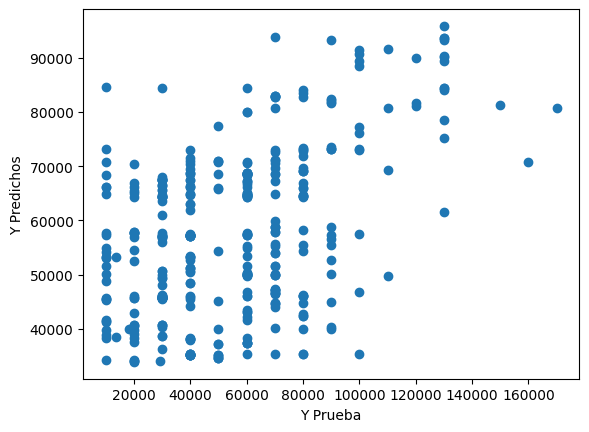

In [233]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Prueba')
plt.ylabel('Y Predichos')

6. Verificamos los residuales

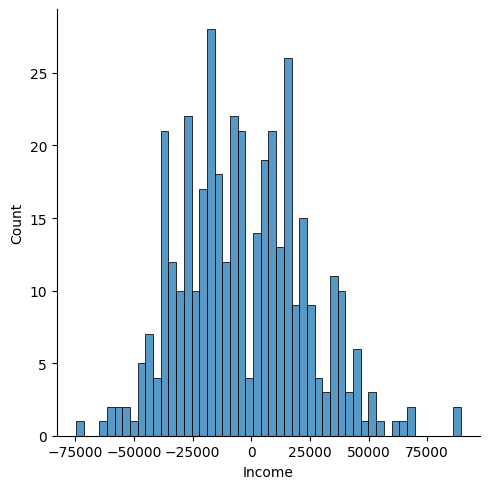

In [234]:
sns.displot((y_test - predictions),bins=50);

7. Metricas de la evaluaciond de la regresion

In [235]:
from sklearn import metrics

In [236]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 22023.317751075192
MSE: 717577859.3727579
RMSE: 26787.64378165347
